In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data is in mm of rainfall
goal is to create a montecarlo simulator of monthly rain in a chosen region 
(let's choose Madhya Pradesh because supposedly it accounts for most of soybean production at 58% of total india)

In [191]:
url_1 = 'district_wise_rainfall_normal.csv'  # https://data.gov.in/catalog/rainfall-i
district_wise_dataset = pd.read_csv(url_1) 
url_2 = 'rainfall_in_india_1901-2015.csv'
subdiv_df = pd.read_csv(url_2)
district_name_mp = district_wise_dataset["STATE_UT_NAME"].unique()
district_name_mp.sort()
mp_string = district_name_mp[19]
district_wise_dataset.set_index(["STATE_UT_NAME", "DISTRICT"],inplace=True)

In [192]:
list_of_subdivs = subdiv_df['SUBDIVISION'].unique()
list_of_subdivs

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [193]:
district_wise_dataset.loc[mp_string]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
DISTRICT,,,,,,,,,,,,,,,,,
BETUL,7.5,8.5,9.3,5.9,6.4,137.0,290.6,293.4,197.5,49.4,13.4,9.9,1028.8,16.0,21.6,918.5,72.7
VIDISHA,14.0,8.2,5.1,1.4,4.4,110.3,356.2,376.0,162.5,24.0,11.9,10.8,1084.8,22.2,10.9,1005.0,46.7
BHIND,10.4,7.1,4.2,1.3,4.6,55.6,221.5,261.4,147.0,39.5,3.9,6.9,763.4,17.5,10.1,685.5,50.3
DATIA,9.1,8.5,5.0,3.4,6.6,62.2,246.0,293.0,174.6,39.8,4.1,7.9,860.2,17.6,15.0,775.8,51.8
DEWAS,7.5,4.0,3.8,1.3,6.2,127.9,311.6,330.7,179.6,34.4,13.5,10.9,1031.4,11.5,11.3,949.8,58.8
DHAR,3.3,1.0,1.4,0.8,4.1,126.4,266.3,261.5,172.6,34.8,11.1,2.8,886.1,4.3,6.3,826.8,48.7
GUNA,12.1,7.1,6.3,2.7,8.6,87.3,336.6,356.0,163.1,28.6,10.6,9.3,1028.3,19.2,17.6,943.0,48.5
GWALIOR,14.5,8.6,5.5,3.7,8.2,71.8,258.0,289.7,171.1,41.5,5.1,8.2,885.9,23.1,17.4,790.6,54.8
HOSHANGABAD,11.8,8.3,9.1,3.2,8.1,140.3,416.6,464.4,267.8,37.4,15.0,10.2,1392.2,20.1,20.4,1289.1,62.6


In [194]:
subdiv_df.set_index(['SUBDIVISION','YEAR'], inplace=True)

In [195]:
west_mp = subdiv_df.loc['WEST MADHYA PRADESH']
east_mp = subdiv_df.loc['EAST MADHYA PRADESH']
west_mp.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
YEAR,,,,,,,,,,,,,,,,,
1901,25.8,5.8,5.8,2.8,2.1,41.2,228.9,349.9,47.9,5.6,0.0,2.4,718.2,31.6,10.7,667.9,7.9
1902,22.1,8.4,0.0,2.0,5.9,35.9,401.9,179.4,194.1,37.9,10.0,14.2,911.7,30.5,8.0,811.2,62.0
1903,5.3,0.0,0.0,0.0,22.3,50.6,304.9,261.1,250.2,55.1,0.0,0.0,949.6,5.3,22.3,866.8,55.1
1904,3.2,15.5,14.8,0.0,12.0,96.6,273.0,218.6,125.9,3.3,1.8,9.6,774.4,18.7,26.9,714.1,14.7
1905,3.5,4.4,1.1,0.8,3.0,36.1,326.3,137.6,183.5,0.3,0.0,0.0,696.5,7.9,4.9,683.5,0.3


In [198]:
west_mp_annual = west_mp['ANNUAL']
east_mp_annual = east_mp['ANNUAL']
east_mp_annual.mean()


1205.0

In [199]:
#check the labels for these columns
print(west_mp.loc[1901]['JUN'] + west_mp.loc[1901]['JUL'] + west_mp.loc[1901]['AUG'] + west_mp.loc[1901]['SEP'], west_mp.loc[1901]['Jun-Sep']) 
print(west_mp.columns[12:])


667.9 667.9
Index(['ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], dtype='object')


In [200]:
columns_to_drop = west_mp.columns[12:]

In [201]:
#ok prune extra columns
west_mp.drop(columns=columns_to_drop, inplace=True)
east_mp.drop(columns=columns_to_drop, inplace=True)
east_mp

/var/folders/hq/62b5kbn954ggcv_0g7_hdfmh0000gn/T/ipykernel_22546/999589201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west_mp.drop(columns=columns_to_drop, inplace=True)
/var/folders/hq/62b5kbn954ggcv_0g7_hdfmh0000gn/T/ipykernel_22546/999589201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_mp.drop(columns=columns_to_drop, inplace=True)


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1901,48.5,38.1,15.7,10.7,6.2,61.0,367.5,589.2,189.9,5.9,0.0,0.0
1902,14.9,8.9,0.0,3.6,2.7,28.0,411.9,227.0,236.6,17.0,27.6,6.1
1903,5.6,2.9,0.3,0.9,37.5,67.5,261.4,366.7,257.4,177.9,0.0,0.0
1904,2.0,15.3,48.2,0.0,8.6,109.9,443.2,316.6,135.6,44.8,3.2,16.9
1905,15.9,8.0,14.3,12.3,10.2,34.4,292.4,243.3,250.9,2.9,0.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0.6,1.9,0.3,7.1,4.7,332.5,323.6,326.9,276.5,1.1,0.0,0.0
2012,39.4,0.7,0.6,1.1,1.2,67.8,398.9,351.7,172.6,12.7,3.8,2.7
2013,2.0,43.4,14.1,9.5,0.3,311.9,456.2,480.8,78.0,124.2,0.5,1.0


In [202]:
east_mp / 25.4


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1901,1.909449,1.500000,0.618110,0.421260,0.244094,2.401575,14.468504,23.196850,7.476378,0.232283,0.000000,0.000000
1902,0.586614,0.350394,0.000000,0.141732,0.106299,1.102362,16.216535,8.937008,9.314961,0.669291,1.086614,0.240157
1903,0.220472,0.114173,0.011811,0.035433,1.476378,2.657480,10.291339,14.437008,10.133858,7.003937,0.000000,0.000000
1904,0.078740,0.602362,1.897638,0.000000,0.338583,4.326772,17.448819,12.464567,5.338583,1.763780,0.125984,0.665354
1905,0.625984,0.314961,0.562992,0.484252,0.401575,1.354331,11.511811,9.578740,9.877953,0.114173,0.000000,0.062992
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0.023622,0.074803,0.011811,0.279528,0.185039,13.090551,12.740157,12.870079,10.885827,0.043307,0.000000,0.000000
2012,1.551181,0.027559,0.023622,0.043307,0.047244,2.669291,15.704724,13.846457,6.795276,0.500000,0.149606,0.106299
2013,0.078740,1.708661,0.555118,0.374016,0.011811,12.279528,17.960630,18.929134,3.070866,4.889764,0.019685,0.039370


Text(0.5, 1.0, 'average rainfall per month in eastern madhya pradesh (in mm)')

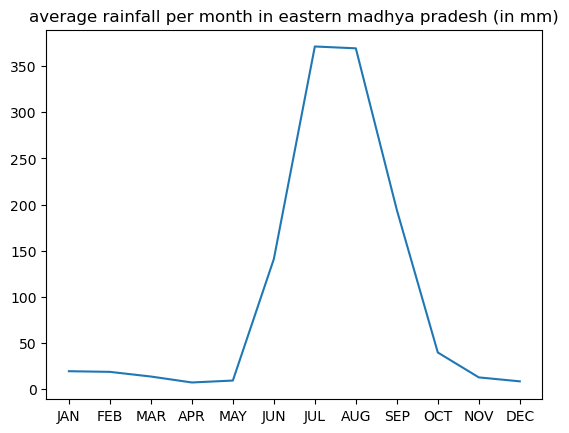

In [203]:
average_east_mp = east_mp.mean()
plt.plot(average_east_mp)
plt.title("average rainfall per month in eastern madhya pradesh (in mm)")

Text(0.5, 1.0, 'average rainfall per month in eastern madhya pradesh (in in)')

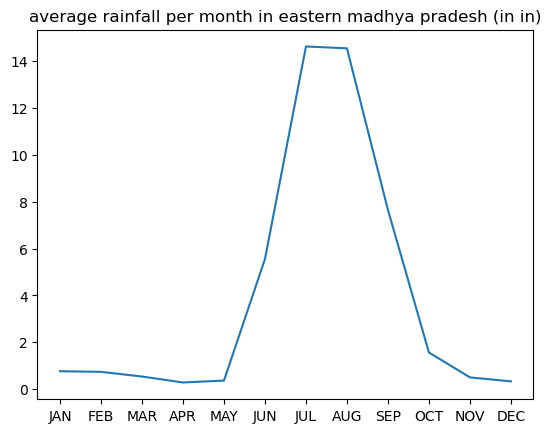

In [204]:
average_east_mp_inches = (east_mp / 25.4).mean()
plt.plot(average_east_mp_inches)
plt.title("average rainfall per month in eastern madhya pradesh (in in)")

Text(0.5, 1.0, 'average rainfall per month in western madhya pradesh (in in)')

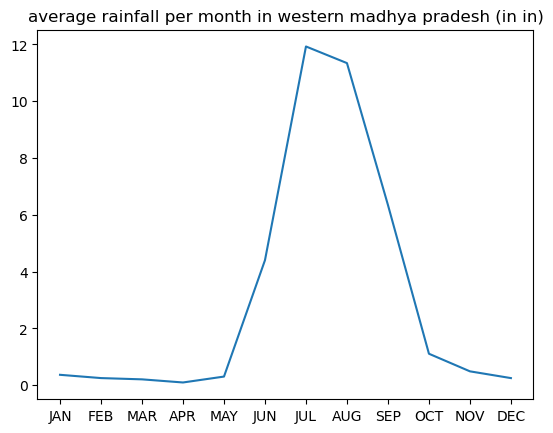

In [205]:
average_west_mp_inches = (west_mp / 25.4).mean()
plt.plot(average_west_mp_inches)
plt.title("average rainfall per month in western madhya pradesh (in in)")

In [221]:
#develop montecarlo simulator of rainfall (ie. random source of rain by random sampling dataset, maybe with weight bias towards more recent years)
# simple idea for now: normal distribution of total rainfall across all 6 months 
west_mp_monsoon = west_mp.drop(columns=['JAN','FEB','MAR','APR','MAY','DEC'])
east_mp_monsoon = east_mp.drop(columns=['JAN','FEB','MAR','APR','MAY','DEC'])
west_mp_monsoon['MONSOON'] = west_mp_monsoon.aggregate(np.sum, axis='columns')
east_mp_monsoon['MONSOON'] = east_mp_monsoon.aggregate(np.sum, axis='columns')
west_mp_monsoon = west_mp_monsoon['MONSOON']
east_mp_monsoon = east_mp_monsoon['MONSOON']
east_mp_monsoon


YEAR
1901    1213.5
1902     948.1
1903    1130.9
1904    1053.3
1905     823.9
         ...  
2011    1260.6
2012    1007.5
2013    1451.6
2014     804.9
2015     784.5
Name: MONSOON, Length: 115, dtype: float64

In [227]:
# create normal distribution out of this dataset
east_monsoon_mean = east_mp_monsoon.mean()
east_monsoon_var = east_mp_monsoon.var()
east_monsoon_std = east_mp_monsoon.std()
east_monsoon_std, east_monsoon_std**2, east_monsoon_var

(210.68239145369952, 44387.07006864988, 44387.07006864988)

In [241]:
#set seed = 1302023
rng = np.random.default_rng(1302023)


In [242]:
random_10_years = rng.normal(east_monsoon_mean, east_monsoon_std, size = 10)
random_10_years

array([1307.18893863, 1536.59634277, 1075.77859306, 1339.59271095,
       1372.32222521, 1329.43334918, 1372.7010363 ,  630.9173875 ,
        920.70823368,  941.70250645])

In [250]:
#now we need to develop the function from rainfall to yield
# for now, use simplistic linear regression on yield and regression as dual variables
# soybean yield from 2007 to 2022 https://www.sopa.org/statistics/soybean-production-by-state/?search_type=search_by_period&arrive=&starting_year_value=2007&ending_year_value=2022&submit=Search
soy_yield = pd.read_excel('soybean_production_by_state.xltx')
soy_yield

,States,Kharif 2007,Unnamed: 2,Unnamed: 3,Kharif 2008,Unnamed: 5,Unnamed: 6,Kharif 2009,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Kharif 2020,Unnamed: 41,Unnamed: 42,Kharif 2021,Unnamed: 44,Unnamed: 45,Kharif 2022,Unnamed: 47,Unnamed: 48
0,NaN,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production,...,Estimated Production,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production
1,Rajasthan,7.635,992,7.574,8.524,860,7.332,7.094,859,6.096,...,6.56,11.002,780,8.585,9.253,761,7.046,10.344,953,9.855
2,Madhya Pradesh,48.792,1045,51.009,51.434,1010,51.94,52.985,1040,55.087,...,40.107,58.541,714,41.774,55.687,939,52.292,50.645,1051,53.248
3,Maharashtra,26.515,1230,32.617,30.684,925,28.387,30.32,982,29.773,...,39.415,40.398,1125,45.446,43.848,1102,48.325,43.446,1080,46.911
4,Andhra Pradesh,1.07,1275,1.364,1.5,1040,1.56,1.81,1050,1.901,...,1.508,1.599,1028,1.644,-,NAN,-,-,NAN,-
5,Chhattisgarh,1.1,815,0.897,1.21,875,1.059,1.29,925,1.193,...,0.539,0.776,884,0.686,0.513,910,0.467,0.42,1050,0.441
6,Gujarat,-,NAN,-,-,NAN,-,-,NAN,-,...,0.861,1.492,972,1.45,2.237,1015,2.271,2.216,1087,2.409
7,Karnataka,1.62,945,1.531,1.99,1015,2.02,2.31,1025,2.368,...,2.694,3.32,1124,3.732,3.827,1005,3.846,4.376,1005,4.398
8,Others,1.764,810,1.429,0.9,866,0.779,0.9,926,0.833,...,1.377,1.257,988,1.242,1.129,975,1.101,1.286,1056,1.358
9,Telangana,-,NAN,-,-,NAN,-,-,NAN,-,...,-,-,NAN,-,3.488,1015,3.54,1.754,1005,1.763


In [287]:
soy_yield_mp = soy_yield.set_index('States')
soy_yield_mp = soy_yield_mp.loc['Madhya Pradesh']
expected_yield = soy_yield_mp.iloc[1::3] #in kilograms per hectare
print(expected_yield.mean()) #this may be low, since online sources + solenkiatal says crop yield is around 1.5 to 2.5 tons / ha



936.8125


In [333]:
#learn linear regression map from rainfall to yield
x_train = east_mp_monsoon.loc[2007:2015].reset_index()
y_train = expected_yield.iloc[0:9].reset_index()
x_train.size, y_train.size
x_train, y_train = x_train.iloc[:,1], y_train.iloc[:,1]
x_train, y_train


(0     601.2
 1     980.6
 2     901.0
 3     941.5
 4    1260.6
 5    1007.5
 6    1451.6
 7     804.9
 8     784.5
 Name: MONSOON, dtype: float64,
 0    1045
 1    1010
 2    1040
 3    1105
 4    1076
 5    1116
 6     684
 7     896
 8     608
 Name: Madhya Pradesh, dtype: object)

In [336]:
XY = pd.concat([x_train, y_train], axis=1, ignore_index=True)
XY

,0,1
0,601.2,1045
1,980.6,1010
2,901.0,1040
3,941.5,1105
4,1260.6,1076
5,1007.5,1116
6,1451.6,684
7,804.9,896
8,784.5,608


In [339]:
import sklearn as skl

In [351]:
XY_np = XY.to_numpy()
XY_np[0]

array([601.2, 1045], dtype=object)

In [244]:
# we need to develop the map from yield to money 